### Prevendo o aceite de termo de crédito em uma instituição Bancária ###

Os dados foram extraídos do repositório no UCI:

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    
E são referentes a uma campanha de marketing de uma instituição bancária em Portugal
Nessa campanha baseada em telefonemas, o cliente respondia se aceitava ou não o termo de crédito

In [15]:
# Bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [16]:
# Lendo o conjunto de dados:
bank = pd.read_csv('datasets/bank-full.csv', sep=';')

In [17]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Verificando o dataframe
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [20]:
# Removendo as classificações de education desconhecidas
bank = bank[bank['education'] != 'unknown']

In [22]:
# LabelEncoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

colunas = ["default", "housing", "loan", "y", "education", "marital", "poutcome", 
           "contact"]

df_col=list(colunas)

for i in range(len(df_col)):
    bank[df_col[i]] = le.fit_transform(bank[df_col[i]])

In [23]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
5,35,management,1,2,0,231,1,0,2,5,may,139,1,-1,0,3,0
6,28,management,2,2,0,447,1,1,2,5,may,217,1,-1,0,3,0


In [24]:
# Convertendo a coluna mês no formato datetime
bank.month = pd.to_datetime(df.month, format = "%b").dt.month

In [25]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2,0,2143,1,0,2,5,5,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,2,5,5,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,2,5,5,76,1,-1,0,3,0
5,35,management,1,2,0,231,1,0,2,5,5,139,1,-1,0,3,0
6,28,management,2,2,0,447,1,1,2,5,5,217,1,-1,0,3,0


In [26]:
bank.education.unique()

array([2, 1, 0])

In [31]:
# Transformando a coluna categorica 'job' em numérica utilizando GetDummies

bank = pd.get_dummies(bank)
bank.head().T

,0,1,2,5,6
age,58,44,33,35,28
marital,1,2,1,1,2
education,2,1,1,2,2
default,0,0,0,0,0
balance,2143,29,2,231,447
housing,1,1,1,1,1
loan,0,0,1,0,1
contact,2,2,2,2,2
day,5,5,5,5,5
month,5,5,5,5,5


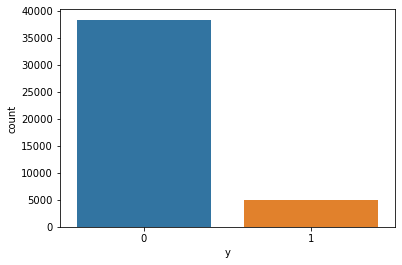

In [34]:
# Verificando o balanceamento entre as classes
sns.countplot(x = 'y', data = bank,
             order = bank['y'].value_counts().index)

In [71]:
# Separando os dados e classes
X = bank.drop("y", axis = 1)
y = bank.y

In [72]:
# Treinando o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\rapha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [73]:
predito = lr.predict(X_test)

In [74]:
accuracy_score(y_test, predito)

0.8904880524033583

In [76]:
print (classification_report(y_test, predito))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9595
           1       0.57      0.19      0.29      1244

    accuracy                           0.89     10839
   macro avg       0.74      0.59      0.62     10839
weighted avg       0.87      0.89      0.87     10839



**Apesar do modelo ter uma ótima acurácia (89%), vemos que o recall (dentre todas as situações de classe Positivo como valor esperado,
quantas estão corretas) está muito desbalanceado. Ele preveu a classe 0 (Não) com uma acertividade de 98%, mas a classe 1 (Sim),
teve um desempenho de apenas 19%.**

### Balanceamento de classes utilizando NearMiss ###

* Reduz a quantidade de amostras da classe majoritária com base na distância entre elas

In [35]:
# Separando os dados e classes
X = bank.drop("y", axis = 1)
y = bank.y

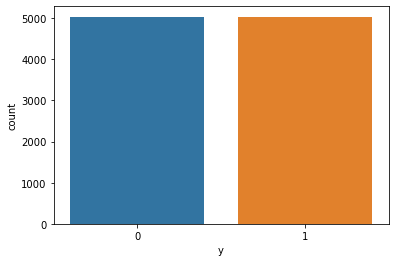

In [37]:
# Testando alguns métodos de balanceamento
nr = NearMiss()
X, y = nr.fit_resample(X, y)
ax = sns.countplot(x=y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()

In [40]:
lr.fit(X_train, y_train)

c:\users\rapha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [42]:
predito = lr.predict(X_test)

In [43]:
accuracy_score(y_test, predito)

0.8789202064311235

In [44]:
print (classification_report(y_test, predito))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1293
           1       0.91      0.84      0.87      1226

    accuracy                           0.88      2519
   macro avg       0.88      0.88      0.88      2519
weighted avg       0.88      0.88      0.88      2519



Confusion Matrix


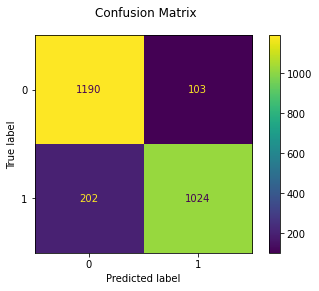

In [46]:
from sklearn import metrics
import matplotlib.pyplot as plt
disp = metrics.plot_confusion_matrix(lr,X_test,y_test)
disp.figure_.suptitle('Confusion Matrix')
print('Confusion Matrix')
plt.show()

### Aplicando o SMOTE ###

* Gera dados sintéticos da classe com a menor quantidade de amostras

In [48]:
X = bank.drop("y", axis = 1)
y = bank.y

In [49]:
smt = SMOTE()
X, y = smt.fit_resample(X, y)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\rapha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [60]:
resultado = lr.predict(X_test)

In [61]:
accuracy_score(y_test, resultado)

0.8474868208152826

In [62]:
print (classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      9509
           1       0.86      0.84      0.85      9650

    accuracy                           0.85     19159
   macro avg       0.85      0.85      0.85     19159
weighted avg       0.85      0.85      0.85     19159



### UnderSampling ###

* Reduz de forma aleatória a quantidade de amostras da classe majoritária, no caso do nosso modelo seriam os clientes 
que não aceitaram o termo de crédito

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = bank.drop("y", axis=1)
y = bank.y

us = RandomUnderSampler()
X, y = us.fit_resample(X,y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\rapha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [65]:
resultado = lr.predict(X_test)

In [66]:
accuracy_score(y_test, resultado)

0.7669710202461294

In [67]:
print (classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1299
           1       0.76      0.76      0.76      1220

    accuracy                           0.77      2519
   macro avg       0.77      0.77      0.77      2519
weighted avg       0.77      0.77      0.77      2519



**Conclusão**

**Vemos que a técnica com melhor desempenho para predição no nosso modelo foi o SMOTE (que gera dados artificiais com base na amostra do nosso modelo), pois teve uma taxa de acerto próxima entre as classes (86% / 84%)** 